In [1]:
# dependencies
import pandas as pd
import numpy as np

In [2]:
# read in CSV
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# add vintage year based on year in title
all_wines['vintage'] = all_wines['title'].str.extract('(\d\d\d\d)', expand=True)

# filling in known variety for nulls
all_wines.iloc[86909, 7] = 'Syrah-Petite Sirah'

# drop unneeded columns
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'title', \
                                      'taster_name', 'taster_twitter_handle'])

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
18796,US,92,25.0,Oregon,Pinot Noir,Ponzi,1998
118885,US,90,40.0,Oregon,Pinot Noir,Soléna,2008
84110,Greece,86,23.0,Pangeon,Assyrtico,Estate Biblia Chora,2010
72404,US,85,11.0,California,Moscato,Barefoot Bubbly,NaN
99019,Portugal,86,7.0,Alentejano,Portuguese Red,Adega Mayor,2014
14795,Israel,91,70.0,Shomron,Cabernet Franc,Teperberg,2013
59571,US,87,30.0,Oregon,Tempranillo,Folin Cellars,2006
102627,US,81,42.0,California,Pinot Noir,La Rochelle,2009
87866,Italy,88,75.0,Piedmont,Nebbiolo,Rocca Giovanni,2012
114420,US,91,70.0,California,Zinfandel,VGS Chateau Potelle,2015


In [4]:
# filling in known country for nulls
has_country = clean_wines[pd.notnull(clean_wines['country'])]
has_country_series = pd.Series(data=has_country['country'].values, index=has_country['winery'])
has_country_dict = has_country_series.to_dict()
clean_wines.loc[clean_wines['country'].isnull(), 'country'] \
    = clean_wines['country'].fillna(clean_wines['winery'].map(has_country_dict))

# drop the remaining nulls
clean_wines = clean_wines.dropna()

# replace variety names with common wine names
clean_wines['variety'] = clean_wines['variety'].replace(['Weissburgunder'], 'Chardonnay')
clean_wines['variety'] = clean_wines['variety'].replace(['Spatburgunder'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Grauburgunder'], 'Pinot Gris')
clean_wines['variety'] = clean_wines['variety'].replace(['Garnacha'], 'Grenache')
clean_wines['variety'] = clean_wines['variety'].replace(['Pinot Nero'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Alvarinho'], 'Albarino')

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
6016,US,90,38.0,California,Chardonnay,Spicy Vines,2015
60237,Italy,87,18.0,Tuscany,Sangiovese,Terre Nere Campigli Vallone,2014
76155,Chile,87,13.0,Maule Valley,Carmenère,Chilcas,2011
126624,Italy,89,15.0,Northeastern Italy,Sauvignon,Conti Formentini,2014
66367,US,88,30.0,Virginia,Viognier,Jefferson Vineyards,2013
28868,Italy,86,14.0,Central Italy,Montepulciano,Casa Catelli,2015
78918,US,86,9.0,California,Sauvignon Blanc,Canyon Road,2001
88166,US,93,40.0,California,Pinot Noir,La Fenêtre,2012
53302,France,88,38.0,Loire Valley,Sauvignon Blanc,Cherrier Frères,2014
24570,US,91,35.0,California,Pinot Noir,La Follette,2014


count    116778.000000
mean         88.457406
std           3.045578
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

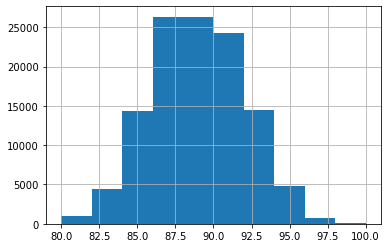

In [5]:
# plot histogram
clean_wines['points'].hist()

# decribe dataframe
clean_wines['points'].describe()

In [6]:
# add rating
clean_wines['quality'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 88 else 'Poor')
clean_wines = clean_wines.drop(columns = ['points'])

# create export of final dataframe
clean_wines.to_csv('Data/recommend_neural_model_df.csv')

# sample
clean_wines.sample(10)

,country,price,province,variety,winery,vintage,quality
118251,France,40.0,Alsace,Riesling,Hugel,2012,Good
23305,US,40.0,California,Chardonnay,Ramey,2012,Good
88721,US,42.0,Washington,Cabernet Franc,Alexandria Nicole,2010,Poor
386,US,34.0,California,Merlot,Merriam,2000,Good
29943,France,22.0,Alsace,Chardonnay,Boeckel,2011,Good
20844,Italy,20.0,Sicily & Sardinia,Red Blend,Hauner,2012,Good
12084,US,28.0,California,Syrah,Mercy,2009,Poor
5911,France,550.0,Burgundy,Chardonnay,Domaine Leflaive,2008,Good
59715,US,65.0,California,Chardonnay,Signorello,2009,Good
33955,US,16.0,New York,Riesling,Rooster Hill,2010,Good


In [7]:
# LabelEncoder dependency
from sklearn.preprocessing import LabelEncoder

# create features
number = LabelEncoder()
features = clean_wines[['country','price','province','variety','winery','vintage']]
features['country'] = number.fit_transform(features['country'].astype('str'))
features['province'] = number.fit_transform(features['province'].astype('str'))
features['variety'] = number.fit_transform(features['variety'].astype('str'))
features['winery'] = number.fit_transform(features['winery'].astype('str'))

# features 
features.sample(10)

C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,country,price,province,variety,winery,vintage
9367,39,21.0,51,495,13238,2007
91051,39,27.0,51,121,6139,2011
73428,8,17.0,82,495,4557,2014
81264,21,70.0,365,489,13018,2006
124496,21,59.0,279,372,2242,2012
109686,14,11.0,11,420,2431,2013
105804,39,23.0,51,345,1534,2015
10252,39,75.0,51,76,6296,2012
80109,30,8.0,385,261,8085,2014
41042,8,17.0,61,495,9268,2014


In [8]:
X = features
y = clean_wines['quality'].astype('category')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.head()

,country,price,province,variety,winery,vintage
100326,39,30.0,51,8,1610,2016
17304,8,20.0,61,495,9900,2013
45169,2,13.0,406,516,15303,2007
61058,3,29.0,378,462,7517,2014
31290,0,35.0,210,271,386,2013


In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, random_state=1)
# # X_scaler = MinMaxScaler().fit(X_train)
# # X_train_scaled = X_scaler.transform(X_train)
# # X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

NameError: name 'StandardScaler' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
d = {'prediction' : prediction_labels, 
     'actual' : y_test}

In [ ]:
predictions_df = pd.DataFrame(data=d)
predictions_df

In [ ]:
predictions_df.to_csv('Data/recommend_neural_model_predictions_df.csv')